## Genetic Algorithm

Find the maximum of a 2D function: 

$$f(x) = x^3 - 60x^2 + 900x + 100$$

The first step is to generate our initial population of individuals (the current set of possible solutions).

We will iterate over several generations improving it until we find an acceptable solution.

The first generation is randomly generated.

In [1]:
# Generate population function

import random

def generate_population(size, x_boundaries):
    lower_x_boundary, upper_x_boundary = x_boundaries

    population = []
    for i in range(size):
        individual = {
            "x": random.uniform(lower_x_boundary, upper_x_boundary)
        }
        population.append(individual)

    return population

In [2]:
# Apply fitness function

def apply_function(individual):
    x = individual["x"]
    return x**3 - 60 * x**2 + 900 * x + 100

In [3]:
# Roulette choice function

def choice_by_roulette(sorted_population, fitness_sum, exponent):
    offset = 0
    
    # Find the lowest fitness to determine if an offset is needed
    lowest_fitness = min(apply_function(ind) for ind in sorted_population)
    if lowest_fitness < 0:
        offset = -lowest_fitness
    
    # Apply offset and exponent to scale fitness values
    scaled_fitnesses = [(apply_function(ind) + offset) ** exponent for ind in sorted_population]
    normalized_fitness_sum = sum(scaled_fitnesses)
    
    # Draw a random number between 0 and the sum of scaled fitness values
    draw = random.uniform(0, normalized_fitness_sum)

    accumulated = 0
    for individual, fitness in zip(sorted_population, scaled_fitnesses):
        accumulated += fitness

        if draw <= accumulated:
            return individual

    # If we haven't returned by now, something went wrong, raise an error
    raise ValueError("Failed to select an individual by roulette wheel. This should not happen.")

In [4]:
# Sort, cross, mutate, and make next generation functions

def sort_population_by_fitness(population):
    return sorted(population, key=apply_function)


def crossover(individual_a, individual_b):
    xa = individual_a["x"]

    xb = individual_b["x"]

    return {"x": (xa + xb) / 2}


def mutate(individual, low_bound, high_bound, mutation):
    next_x = individual["x"] + random.uniform(-mutation, mutation)

    lower_boundary, upper_boundary = (low_bound, high_bound)

    # Guarantee we keep inside boundaries
    next_x = min(max(next_x, lower_boundary), upper_boundary)

    return {"x": next_x}


def make_next_generation(previous_population, low_bound, high_bound, mutation, exponent):
    next_generation = []
    sorted_by_fitness_population = sort_population_by_fitness(previous_population)
    population_size = len(previous_population)
    fitness_sum = sum(apply_function(individual) for individual in population)

    for i in range(population_size):
        first_choice = choice_by_roulette(sorted_by_fitness_population, fitness_sum, exponent)
        second_choice = choice_by_roulette(sorted_by_fitness_population, fitness_sum, exponent)

        individual = crossover(first_choice, second_choice)
        individual = mutate(individual, low_bound, high_bound, mutation)
        next_generation.append(individual)

    return next_generation

### Run the Algorithm

In [5]:
# Constants

generations = 100
low_bound = 6
high_bound = 14
population_size = 20
mutation = 0.1
exp = 2
i = 1

In [6]:
# Create initial population

population = generate_population(size=population_size, x_boundaries=(low_bound, high_bound))

In [7]:
# Algorithm

while True:
    print(f"🧬 GENERATION {i}")

    for individual in population:
        print(individual, apply_function(individual))

    if i == generations:
        break

    i += 1

    population = make_next_generation(population, low_bound, high_bound, mutation, exp)

best_individual = sort_population_by_fitness(population)[-1]
print("\n🔬 FINAL RESULT")
print(best_individual, apply_function(best_individual))

🧬 GENERATION 1
{'x': 12.683381148339805} 3903.3057466147966
{'x': 6.166109547600046} 3602.685253031108
{'x': 13.314683820984396} 3806.80499318926
{'x': 6.332461471836095} 3647.143364594086
{'x': 6.912642560401873} 3784.6187217825423
{'x': 6.995077295804694} 3801.9800550246323
{'x': 12.112623896711318} 3975.533628282037
{'x': 6.564949761570136} 3705.480779559266
{'x': 13.430503543022619} 3787.320745248413
{'x': 9.612380088209552} 4095.434284539402
{'x': 10.225636779696375} 4098.484128919326
{'x': 11.891815807745875} 3999.401734928303
{'x': 7.565471393615549} 3907.7628344391505
{'x': 11.090036200040373} 4065.649790510135
{'x': 8.541222881693532} 4033.0547571088205
{'x': 6.815660480292984} 3763.510194086133
{'x': 11.150937099166082} 4061.7849097842936
{'x': 9.63082097485834} 4095.8608888486515
{'x': 9.994511143859482} 4099.999096008383
{'x': 7.691931720162317} 3927.8891311717052
🧬 GENERATION 2
{'x': 7.312805348052929} 3863.965273924907
{'x': 7.330113575867789} 3867.1194603767235
{'x': 6.6

In [10]:
# Run trials to determine performance of algorithm

def run_trials(num_trials, generations, population_size, x_boundaries, mutation_rate, exponent):
    final_results = []

    for trial in range(num_trials):
        population = generate_population(size=population_size, x_boundaries=x_boundaries)

        for i in range(generations):
            population = make_next_generation(population, *x_boundaries, mutation_rate, exponent)

        best_individual = sort_population_by_fitness(population)[-1]
        best_fitness = apply_function(best_individual)
        final_results.append(best_fitness)

    # Calculate and print summary statistics
    average_best_fitness = sum(final_results) / num_trials
    min_fitness = min(final_results)
    max_fitness = max(final_results)

    print(f"🔬 SUMMARY STATISTICS AFTER {num_trials} TRIALS:")
    print(f"Average Best Fitness: {average_best_fitness}")
    print(f"Highest Fitness Achieved: {max_fitness}")
    print(f"Lowest Fitness Achieved: {min_fitness}")

    return final_results

In [26]:
# Run the experiment and get statistics

num_trials = 100
exp = 3
x_boundaries = (low_bound, high_bound)

final_results = run_trials(
    num_trials, generations, population_size, x_boundaries, mutation, exp)

🔬 SUMMARY STATISTICS AFTER 100 TRIALS:
Average Best Fitness: 4091.9474574121327
Highest Fitness Achieved: 4099.999994994107
Lowest Fitness Achieved: 3989.459614030558


Text(0.5, 1.0, 'Final Fitnesses for 100 Trials')

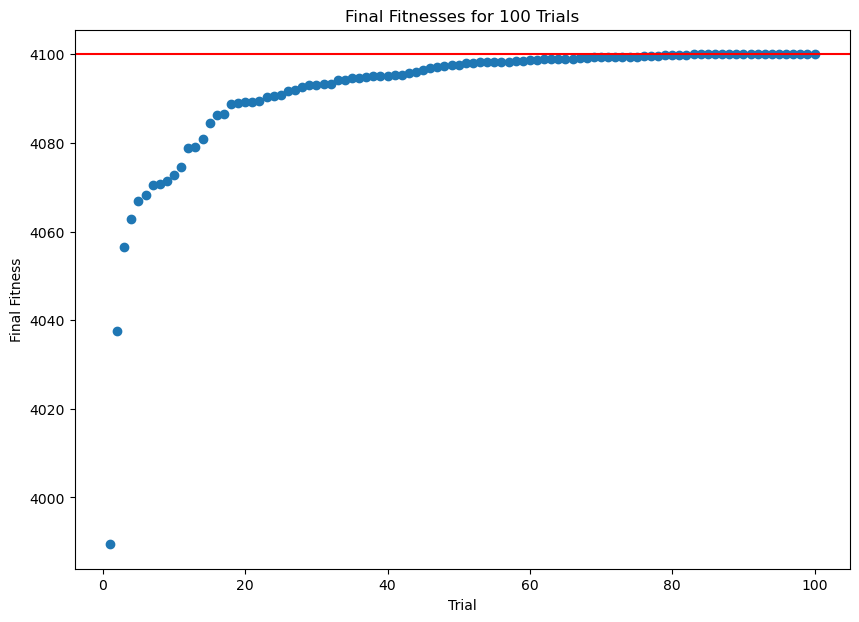

In [35]:
# Plot best fitnesses

import numpy as np
import matplotlib.pyplot as plt

# Sort final_results ascending and create x range
final_results.sort()
x = np.linspace(1, num_trials, num_trials)

fig = plt.figure(figsize=(10, 7))
plt.scatter(x, final_results)
plt.axhline(y=4100, color='r', linestyle='-')
plt.xlabel('Trial')
plt.ylabel('Final Fitness')
plt.title(f"Final Fitnesses for {num_trials} Trials")